**Import all the required external modules for things to run properly**

In [1]:
import pyproj
import numpy as np
import networkx as nx
import shapely
from networkx import draw_networkx_edge_labels, draw_networkx, astar_path, layout, to_agraph, DiGraph
from macrosimulation.get_latest_data import create_data_array as cda
import macrosimulation.location_stuff as ls
import macrosimulation.create_network as cn
import macrosimulation.draw_network as dn

**Import all the modules required for plotting graphs, and define some required parameters**

In [2]:
%pylab inline
rcParams['figure.figsize'] = (16,9)
rcParams['image.interpolation'] = 'none'

Populating the interactive namespace from numpy and matplotlib


**Import flow and location data in the required format**

In [5]:
locs_set = cda('location')
flows = cda('flow')

Location data downloaded. Beginning processing...
Data downloaded. Beginning processing...


**Grab the flow data and put it into a network object, filling in gaps**

*Create an array of all edges within the required region*

In [6]:
roads = ls.localise_map(locs_set, 0.119, 52.505, 0.4)

*Create lists of nodes and edges*

In [7]:
in_nodes, out_nodes = cn.nodes(roads, flows)
edges = cn.edges_from_nodes(in_nodes, out_nodes)

*Create a DiGraph object from the lists*

In [8]:
G = cn.create_digraph(edges, flows, roads, True)

*Create a list of lines in the DiGraph*

In [9]:
lines, l_flows = cn.lines_from_digraph(G)

*Create a list of which nodes are adjacent to which*

In [10]:
node_adjacents = cn.node_adjacencies(G)

*Create a list of the best paths between nodes*

In [11]:
best_paths = cn.best_paths(G, node_adjacents)

Computed 2695 paths. Expected to compute 82656


*Create a routing matrix*

In [12]:
routing = cn.create_routing_matrix(best_paths, G)

*Create a thresholded DiGraph*

In [13]:
#threshG = cn.create_thresholded_digraph(l_flows, 600, best_paths, routing)

*Draw a visual representation of flow between nodes of the thresholded graph*

In [14]:
#dn.node_map(threshG, 1)

**Draw the map**

*Iterate over every edge and store a linestring in the data dict with the "geom" key*

In [15]:
G = dn.make_geom_linestring(G)

*Create a subgraph of the required area (in this case, Cambridge and its surrounding towns)*

In [16]:
#Cambridge coordinates: 0.119, 52.505

In [24]:
subG = dn.create_subgraph(G, 0.119, 52.505, 60e3)

*Let's make the map then...*

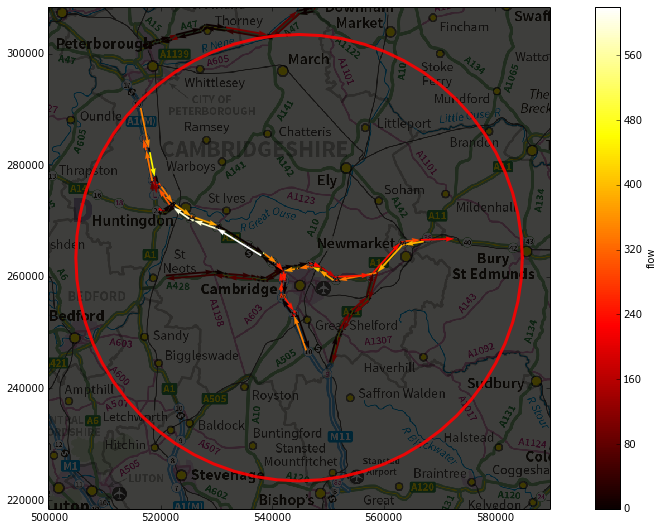

In [25]:
map_background = 'MiniScale_(standard)_R17.tif'
dn.draw_submap(map_background, 300, subG, 0.12, 52.25, 40e3, 'flow')